In [113]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

#ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [114]:
#load dataset
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [116]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [117]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [118]:
#Mengecek jumlah data yang duplikat
data.duplicated().sum()

0

In [119]:
#target distribusi
print(data.groupby('Exited').size())

Exited
0    7963
1    2037
dtype: int64


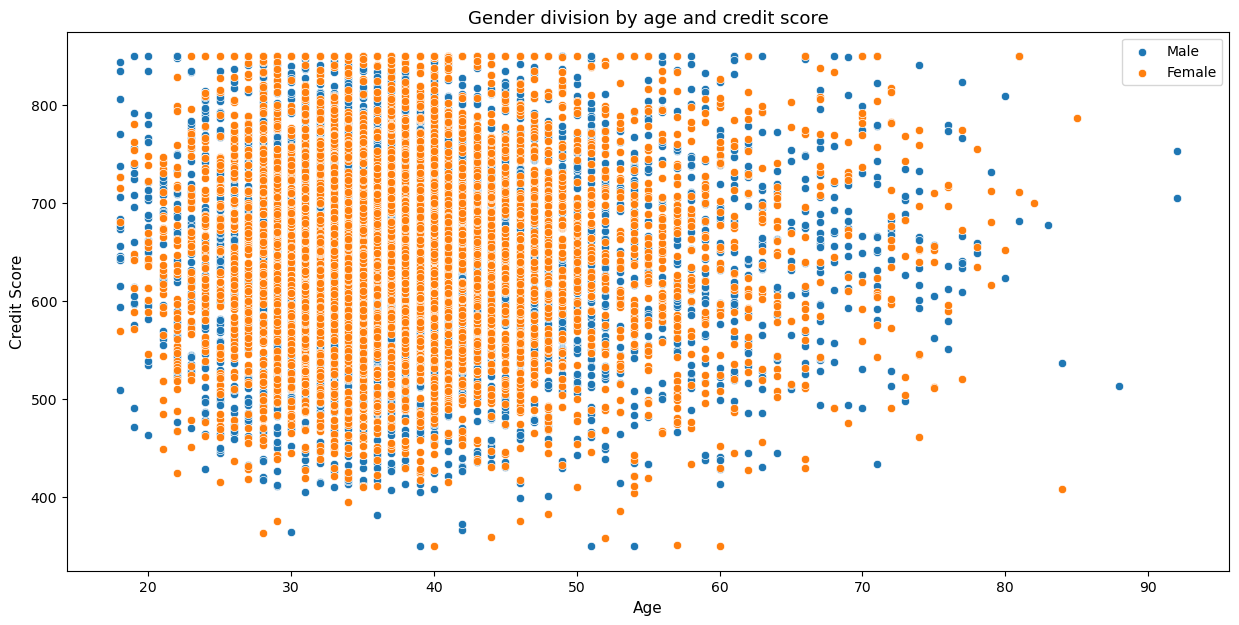

In [120]:
gender=["Male","Female"]
plt.figure(figsize=(15,7))
colors=sns.color_palette(["#DC3535","#59C1BD"])
for i in gender:
    sns.scatterplot(x="Age",y="CreditScore",data=data[data["Gender"]==i],label=i,palette=colors)
plt.title("Gender division by age and credit score",size=13)
plt.xlabel("Age",size=11)
plt.ylabel("Credit Score",size=11)
plt.show()

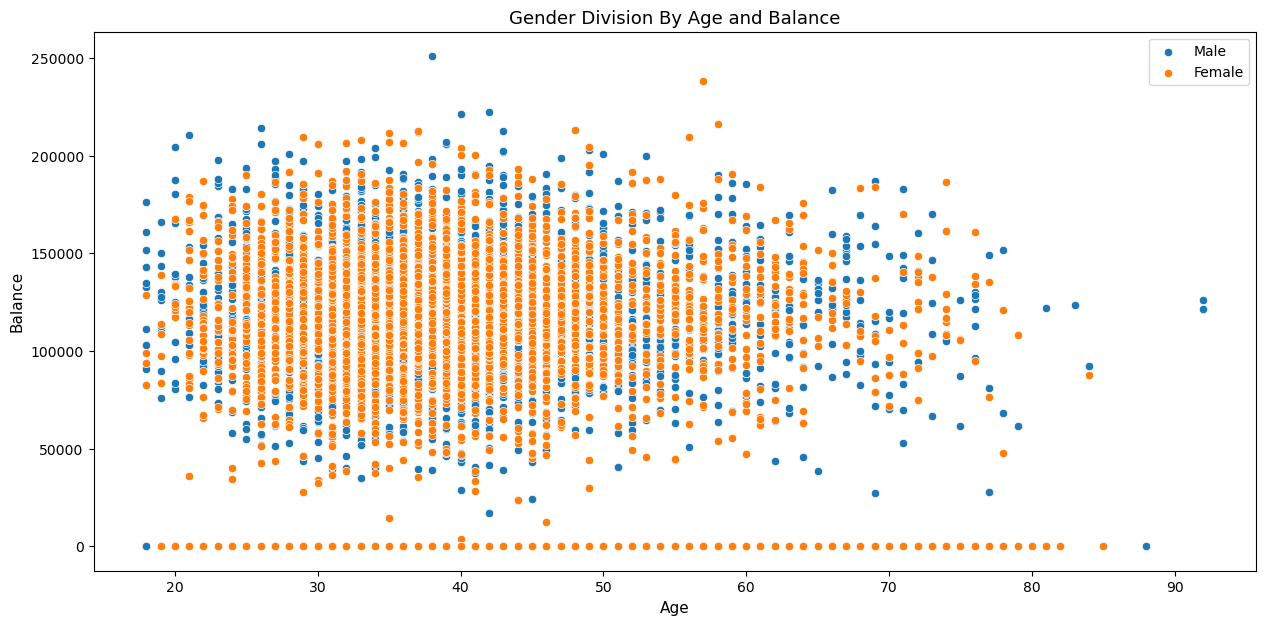

In [121]:
gender=["Male","Female"]
plt.figure(figsize=(15,7))
colors=sns.color_palette(["#DC3535","#59C1BD"])
for i in gender:
    sns.scatterplot(x="Age",y="Balance",data=data[data["Gender"]==i],label=i,palette=colors)
plt.title("Gender Division By Age and Balance",size=13)
plt.xlabel("Age",size=11)
plt.ylabel("Balance",size=11)
plt.show()

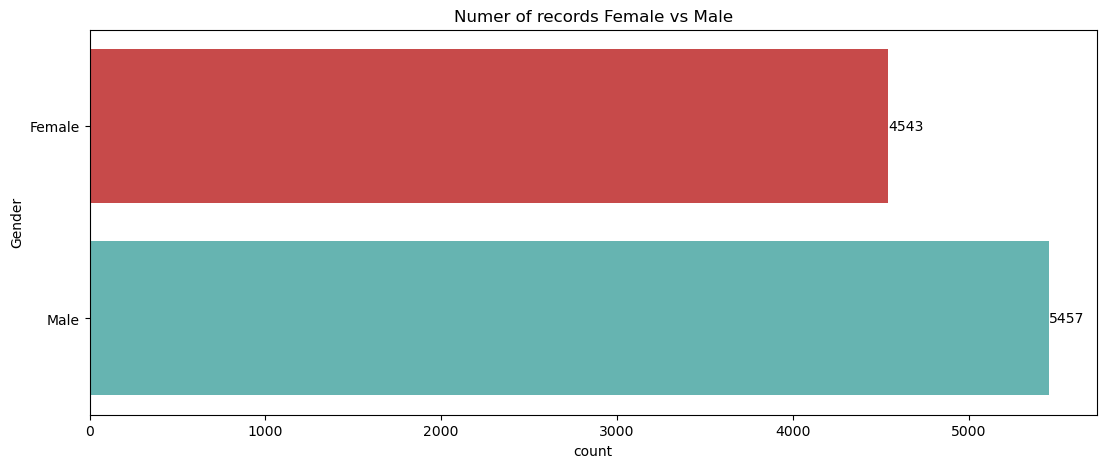

In [122]:
plt.figure(figsize=(13,5))
colors=sns.color_palette(["#DC3535","#59C1BD"])
ax=sns.countplot(data=data,y="Gender",palette=colors)
plt.title("Numer of records Female vs Male")
for i in ax.containers:
    ax.bar_label(i)

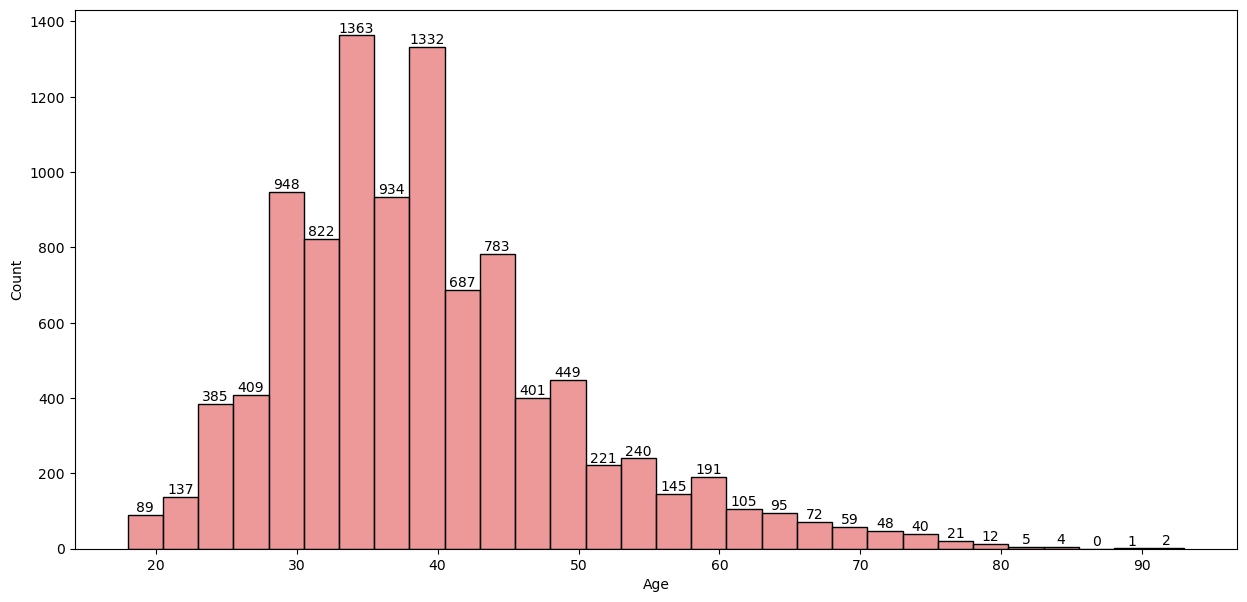

In [123]:
plt.figure(figsize=(15,7))
ax=sns.histplot(data=data,x="Age",color="#E97777",binwidth=2.5,element="bars")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [125]:
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [126]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    data['Surname'] = le.fit_transform(data['Surname'].astype(str))
    data['Geography'] = le.fit_transform(data['Geography'].astype(str))
    data['Gender'] = le.fit_transform(data['Gender'].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int32  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(3), int64(9)
memory usage: 976.7 KB
None


In [127]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,347,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1101,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,179,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,1227,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,2840,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,127,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,2240,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,2529,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,554,772,1,1,42,3,75075.31,2,1,0,92888.52,1


C:\Users\WAYCOM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\WAYCOM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\WAYCOM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



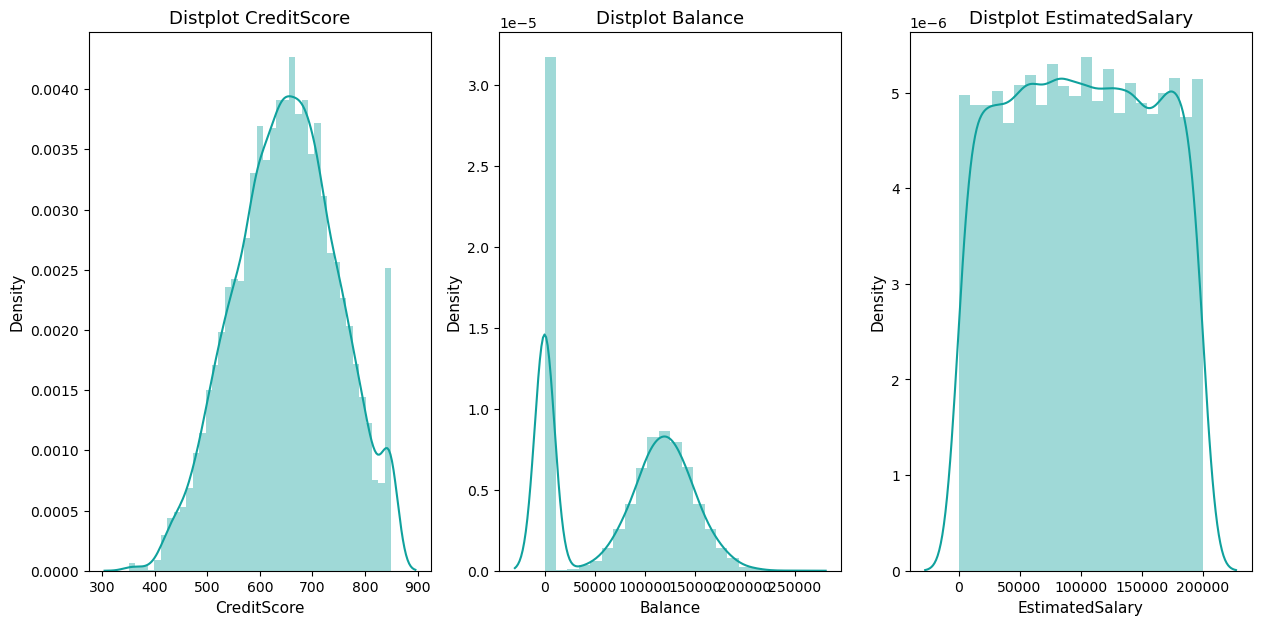

In [128]:
datadist=["CreditScore","Balance","EstimatedSalary"]
plt.figure(figsize=(15,7))
n=0
for i in datadist:
    n=n+1
    plt.subplot(1,3,n)
    sns.distplot(data[i],color="#10A19D")
    plt.title('Distplot {}'.format(i),size=13)
    plt.xlabel('{}'.format(i),size=11)
    plt.ylabel('{}'.format("Density"),size=11)
plt.show()

In [129]:
#corelasi feature
corr = data.corr()

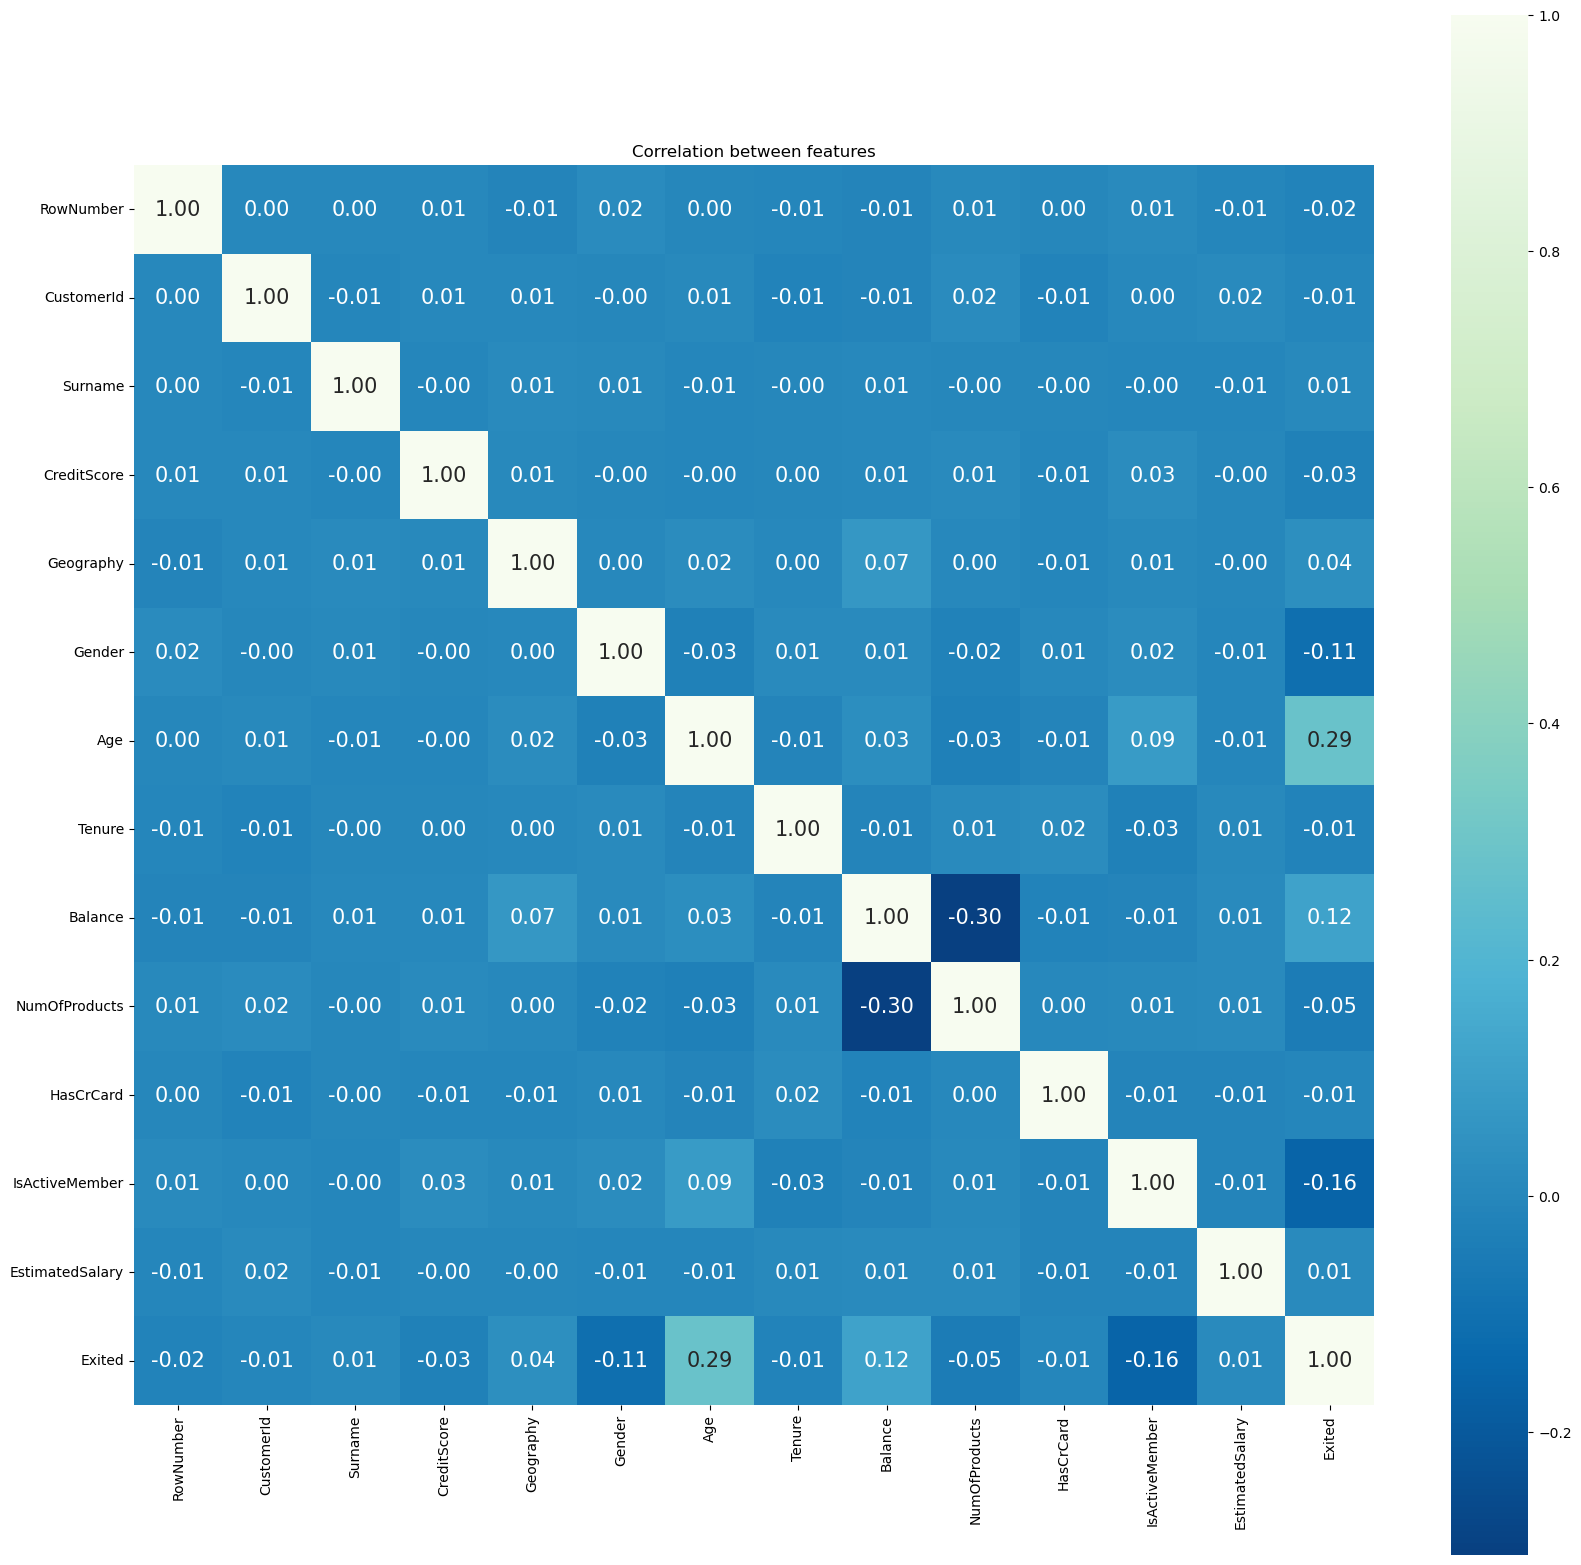

In [130]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'GnBu_r')
plt.title('Correlation between features');
plt.savefig("corr.png") # save as png

In [131]:
x = data.drop(columns=['Exited'])
y = data['Exited']

len(y)

10000

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

In [133]:
#import Scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [134]:
x_train

array([[0.52905872, 0.03923773, 0.96076424, ..., 0.        , 1.        ,
        0.76832988],
       [0.87716315, 0.22157775, 0.29068577, ..., 0.        , 0.        ,
        0.24109892],
       [0.00330099, 0.91392021, 0.86966905, ..., 1.        , 0.        ,
        0.13907033],
       ...,
       [0.9859958 , 0.19892475, 0.79085636, ..., 1.        , 1.        ,
        0.92065552],
       [0.1686506 , 0.95567805, 0.34049812, ..., 0.        , 1.        ,
        0.80305409],
       [0.59937981, 0.72148775, 0.86386899, ..., 1.        , 1.        ,
        0.12395129]])

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8145

In [136]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [137]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score

# define model
knn = KNeighborsClassifier(6)
# fit it
knn.fit(x_train,y_train)
# test
test_pred = knn.predict(x_test)
train_pred = knn.predict(x_train)

print("Training:")
KNeighborsClassifierScore = knn.score(x_train,y_train)
print("Accuracy KNN model:",KNeighborsClassifierScore*100)
print("ROC :", {roc_auc_score(y_train,train_pred)})
print(f'Confusion Matrix: \n{confusion_matrix(y_train, train_pred)}')
print("")
report=classification_report(y_train,train_pred)# it will give precision,recall,f1 scores and accuracy  
print("Training:")
print(report)


Training:
Accuracy KNN model: 82.8125
ROC : {0.5984690755678538}
Confusion Matrix: 
[[6282   76]
 [1299  343]]

Training:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      6358
           1       0.82      0.21      0.33      1642

    accuracy                           0.83      8000
   macro avg       0.82      0.60      0.62      8000
weighted avg       0.83      0.83      0.78      8000



In [138]:
#plotting a Crosstab for the KNN Classifier
from sklearn.metrics import confusion_matrix
import plotly.express as px
heatmap = px.imshow(confusion_matrix(y_train,train_pred)
,aspect="auto",text_auto=True,color_continuous_scale="amp")
heatmap.update_layout(title = "Confusion Matrix for KNN Classifier Training")
heatmap.update_xaxes(title="Predicted")
heatmap.update_yaxes(title="Actual")
heatmap.show()

In [139]:
print("Testing")
KNeighborsClassifierScore1 = knn.score(x_test,y_test)
print("Accuracy KNN model :",KNeighborsClassifierScore1*100)
print("ROC :", {roc_auc_score(y_test,test_pred)})
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')
print("")

report=classification_report(y_test,test_pred)# it will give precision,recall,f1 scores and accuracy  
print("Testing:")
print(report)

Testing
Accuracy KNN model : 81.69999999999999
ROC : {0.5643834536062147}
Confusion Matrix: 
[[1576   29]
 [ 337   58]]

Testing:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1605
           1       0.67      0.15      0.24       395

    accuracy                           0.82      2000
   macro avg       0.75      0.56      0.57      2000
weighted avg       0.79      0.82      0.77      2000



In [140]:
#plotting a Crosstab for the KNN Classifier
from sklearn.metrics import confusion_matrix
import plotly.express as px
heatmap = px.imshow(confusion_matrix(y_test,test_pred)
,aspect="auto",text_auto=True,color_continuous_scale="amp")
heatmap.update_layout(title = "Confusion Matrix for KNN Classifier Testing")
heatmap.update_xaxes(title="Predicted")
heatmap.update_yaxes(title="Actual")
heatmap.show()

In [141]:
import pickle
Pkl_Filename = "KNN.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn, file)

In [142]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

KNeighborsClassifier(n_neighbors=6)